In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
import datetime as dt
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
df = pd.read_csv('houses_Madrid.csv')
df.sample(5)

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
13543,13543,8199,Piso en venta en Colina,"Ciudad Lineal, Madrid",274.00,NaN,4,3.00,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,1,False,NaN,Neighborhood 44: Colina (4677.53 €/m2) - Distr...,sale,2416,NaN,False,849000,3099,True,HouseType 1: Pisos,True,False,1978.00,True,False,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,E,True,NaN,NaN,True,0.00,True,True,True,False
9676,9676,12066,Piso en venta en calle Andrés Obispo,"Canillas, Madrid",78.00,48.00,1,1.00,NaN,NaN,NaN,NaN,Calle Andrés Obispo,True,Calle Andrés Obispo,NaN,NaN,Bajo,True,NaN,Neighborhood 58: Canillas (3152.53 €/m2) - Dis...,sale,1122,NaN,False,270000,3462,True,HouseType 1: Pisos,False,False,2006.00,False,True,NaN,True,True,True,False,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,en trámite,True,NaN,NaN,True,0.00,False,False,False,True
8032,8032,13710,Chalet adosado en venta en Aravaca,"Moncloa, Madrid",282.00,NaN,5,4.00,4.00,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,False,NaN,Neighborhood 72: Aravaca (3600.4 €/m2) - Distr...,sale,2103,NaN,False,690000,2447,True,HouseType 2: Casa o chalet,False,False,1987.00,False,True,NaN,True,True,NaN,NaN,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,no indicado,True,NaN,NaN,True,0.00,False,False,False,True
1202,1202,20540,"Chalet pareado en venta en calle Paraíso, 2","Casco Histórico de Vicálvaro, Madrid",168.00,NaN,3,3.00,2.00,NaN,NaN,NaN,"Calle Paraíso, 2",False,Calle Paraíso,2,NaN,NaN,False,NaN,Neighborhood 125: Casco Histórico de Vicálvaro...,sale,1656,NaN,False,495500,2949,True,HouseType 2: Casa o chalet,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16507,16507,5235,Piso en venta en paseo de Santa María de la Ca...,"Comillas, Madrid",48.00,45.00,1,1.00,NaN,NaN,NaN,NaN,"Paseo de Santa María de la Cabeza, 118",False,Paseo de Santa María de la Cabeza,118,NaN,Bajo,True,NaN,Neighborhood 14: Comillas (2527.59 €/m2) - Dis...,sale,738,NaN,False,148500,3094,True,HouseType 1: Pisos,False,False,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,A,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

Data Cleaning

In [4]:
df=df[['id','title','subtitle','sq_mt_built','sq_mt_useful','n_rooms','n_bathrooms','n_floors','sq_mt_allotment','street_number','rent_price','buy_price','buy_price_by_area']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   title              21742 non-null  object 
 2   subtitle           21742 non-null  object 
 3   sq_mt_built        21616 non-null  float64
 4   sq_mt_useful       8228 non-null   float64
 5   n_rooms            21742 non-null  int64  
 6   n_bathrooms        21726 non-null  float64
 7   n_floors           1437 non-null   float64
 8   sq_mt_allotment    1432 non-null   float64
 9   street_number      6300 non-null   object 
 10  rent_price         21742 non-null  int64  
 11  buy_price          21742 non-null  int64  
 12  buy_price_by_area  21742 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 2.2+ MB


In [6]:
df=df.drop(columns=['sq_mt_useful','n_floors','sq_mt_allotment','street_number','title'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   subtitle           21742 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   n_rooms            21742 non-null  int64  
 4   n_bathrooms        21726 non-null  float64
 5   rent_price         21742 non-null  int64  
 6   buy_price          21742 non-null  int64  
 7   buy_price_by_area  21742 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [8]:
df.sample(5)

,id,subtitle,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area
1343,20399,"Ensanche de Vallecas - La Gavia, Madrid",111.00,3,2.00,1299,340000,3063
10584,11158,"Hortaleza, Madrid",275.00,4,5.00,2417,850000,3091
5534,16208,"Numancia, Madrid",68.00,3,1.00,557,104000,1529
9171,12571,"La Paz, Madrid",122.00,3,2.00,1382,375000,3074
13577,8165,"San Pascual, Madrid",70.00,2,1.00,964,215000,3071


In [9]:
df.describe()

,id,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area
count,21742.00,21616.00,21742.00,21726.00,21742.00,21742.00,21742.00
mean,10871.50,146.92,3.01,2.09,-59170.31,653735.65,4020.52
std,6276.52,134.18,1.51,1.41,917116.18,782082.07,1908.42
min,1.00,13.00,0.00,1.00,-34590276.00,36000.00,447.00
25%,5436.25,70.00,2.00,1.00,725.00,198000.00,2551.00
50%,10871.50,100.00,3.00,2.00,1116.00,375000.00,3720.00
75%,16306.75,162.00,4.00,2.00,1687.00,763600.00,5000.00
max,21742.00,999.00,24.00,16.00,2517.00,8800000.00,18889.00


In [10]:
df['n_bathrooms'].mode()

0   1.00
Name: n_bathrooms, dtype: float64

In [11]:
df['n_bathrooms']=df['n_bathrooms'].fillna(1) 

In [12]:
df['n_rooms'].mode()

0    3
Name: n_rooms, dtype: int64

In [13]:
df['n_rooms']=df['n_rooms'].replace(0,3) 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   subtitle           21742 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   n_rooms            21742 non-null  int64  
 4   n_bathrooms        21742 non-null  float64
 5   rent_price         21742 non-null  int64  
 6   buy_price          21742 non-null  int64  
 7   buy_price_by_area  21742 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [15]:
df.dropna(subset=['sq_mt_built'], inplace=True)

In [16]:
df['n_bathrooms']=df['n_bathrooms'].astype(int)

In [17]:
df.rename(columns={'subtitle':'district'},inplace=True)

In [18]:
df['district']=df['district'].str.split(',',expand=True)[0]

In [19]:
df['rent_price'].describe() 

count       21616.00
mean       -49016.05
std        862127.12
min     -34590276.00
25%           727.00
50%          1121.00
75%          1689.00
max          2517.00
Name: rent_price, dtype: float64

In [20]:
df['rent_price']=df['rent_price'].abs()
df['rent_price'].describe()

count      21616.00
mean       51391.90
std       861988.75
min           18.00
25%          884.00
50%         1323.00
75%         2035.00
max     34590276.00
Name: rent_price, dtype: float64

In [21]:
df.drop(columns=['rent_price'],inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21616 entries, 0 to 21741
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21616 non-null  int64  
 1   district           21616 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   n_rooms            21616 non-null  int64  
 4   n_bathrooms        21616 non-null  int64  
 5   buy_price          21616 non-null  int64  
 6   buy_price_by_area  21616 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.3+ MB


In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.sample(5)

,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
19024,2718,Centro,69.00,2,2,480000,6957
15435,6307,Chamartín,149.00,3,2,533000,3577
11312,10430,Almagro,167.00,4,3,1075000,6437
21014,728,Palos de Moguer,79.00,3,1,389000,4924
12064,9678,Trafalgar,93.00,2,2,560000,6022


Exploratory Data Analysis

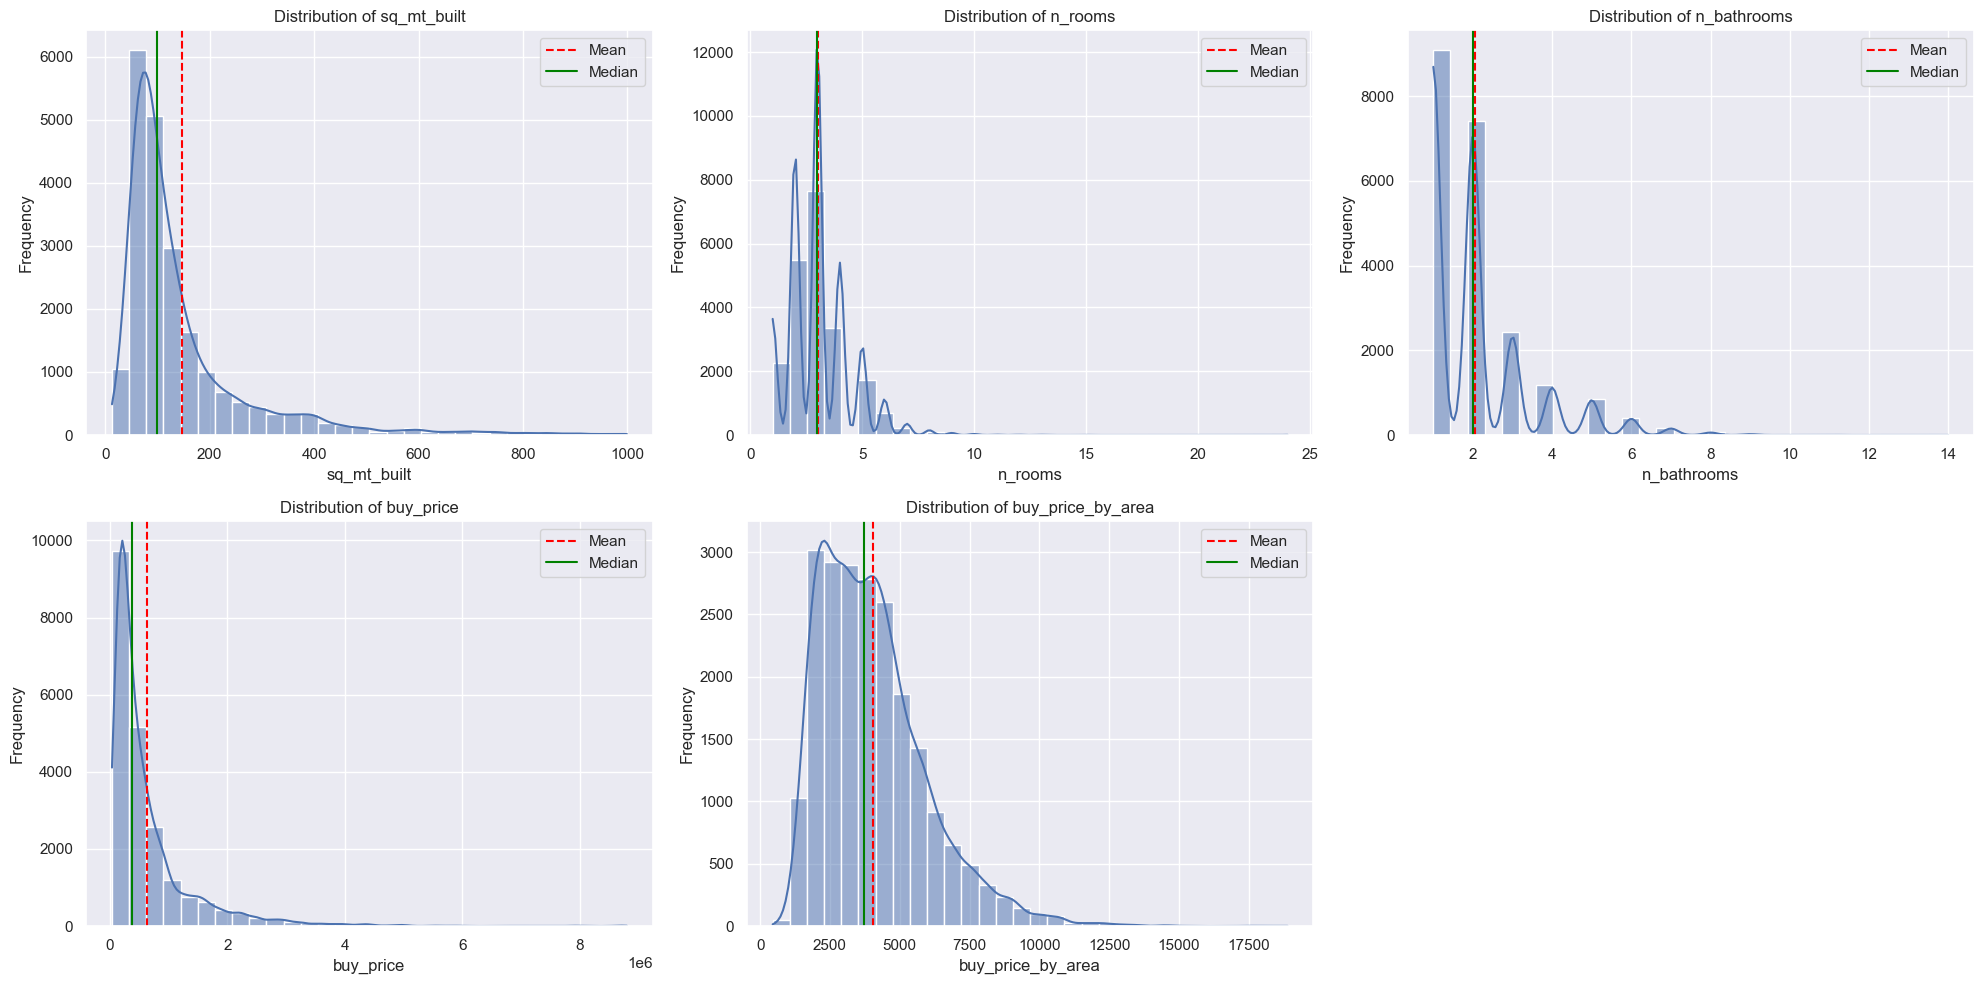

In [25]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns[2:]):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col], kde=True,bins=30)
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='-', label='Median')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()    


-For sq_mt_built,The distribution is right-skewed, Most houses are small to medium, have a built area between 50–150 square meters a while large houses are rare.

-n_rooms is mostly between 2 and 4, Some houses have a very high number of rooms like 10.

-Same thing with n_bathrooms, most houses have 1 or 2

-buy_price, The distribution is right-skewed, The mean is higher than the median, a few expensive houses are pulling the average up, but most prices are lower.

-buy_price_by_area, The distribution is right-skewed, Most prices are between €2,500 and €5,000 per square meter.




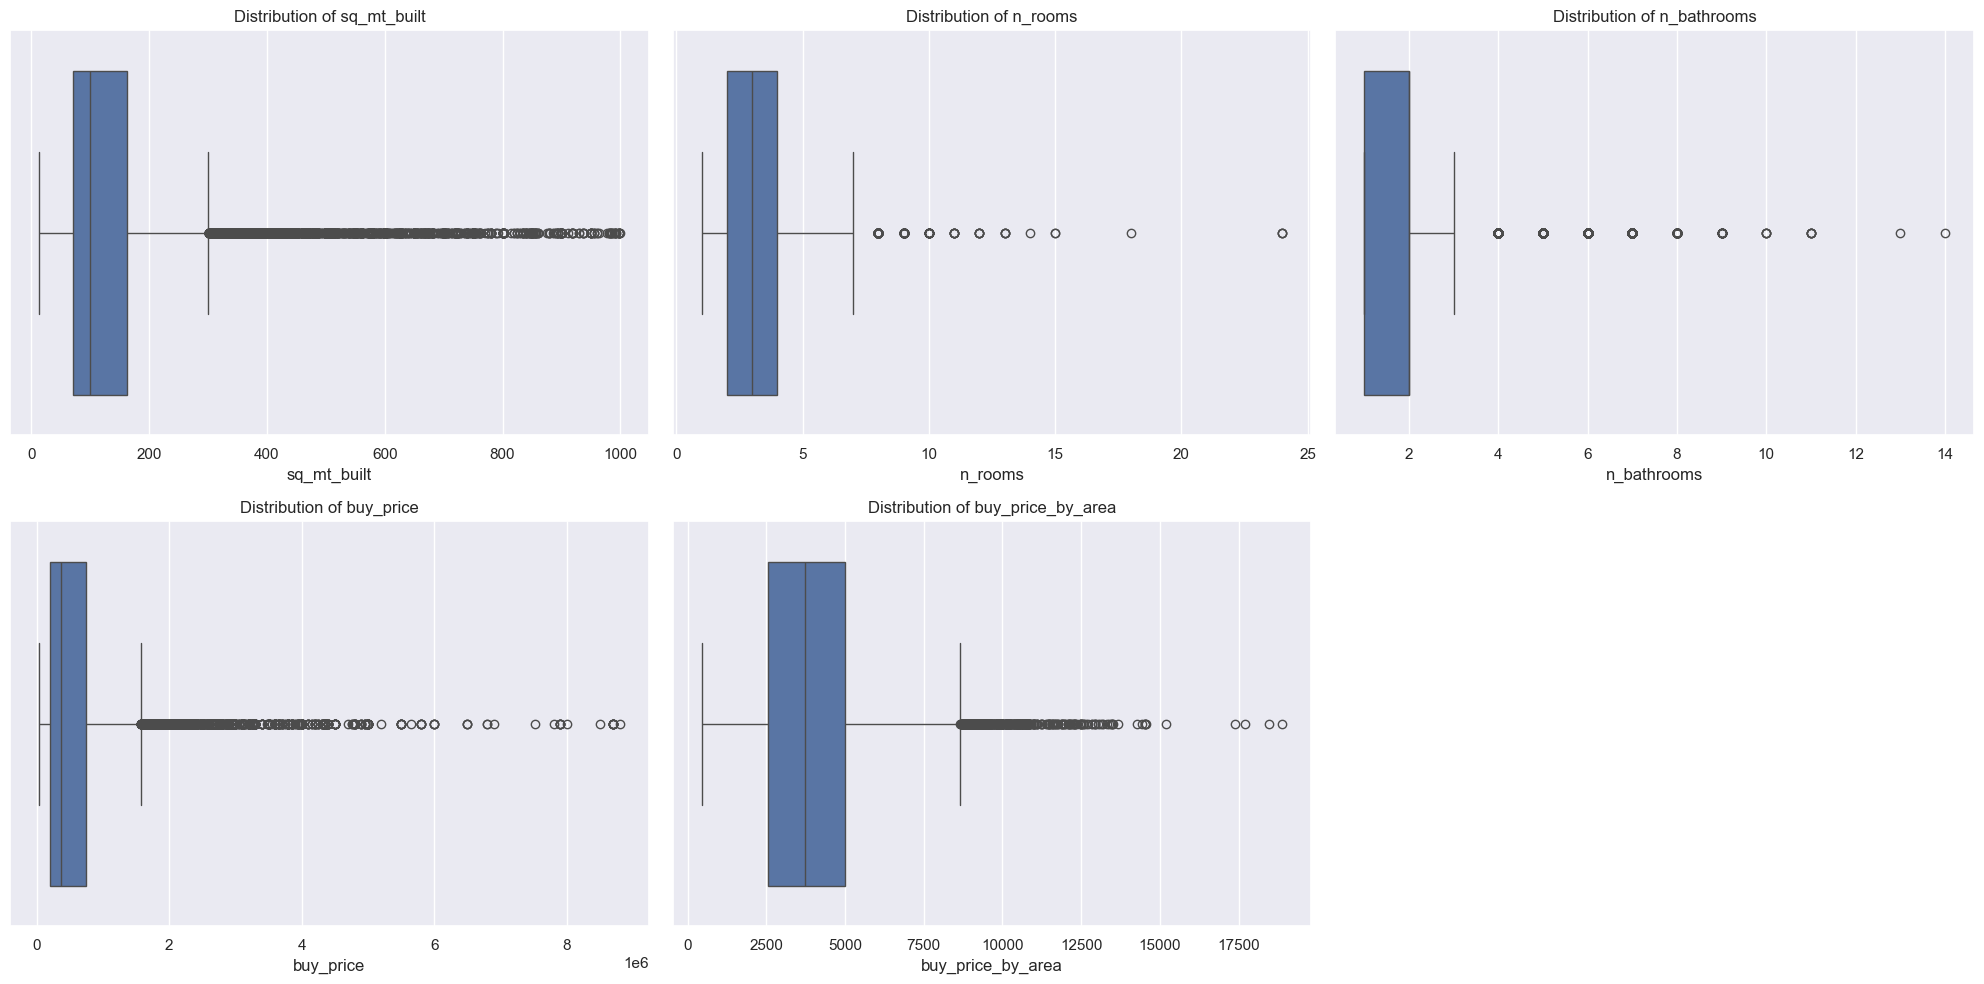

In [26]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns[2:]):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
    

Boxplots give a quick 5-number summary (min, Q1, median, Q3, max), Most features show clear outliers, especially in size and price. This changes the shape of the data.


In [27]:
df['district'].value_counts()

district
Chamartín                           850
Moncloa                             695
Chamberí                            583
Centro                              552
Hortaleza                           484
Barrio de Salamanca                 457
Fuencarral                          376
Malasaña-Universidad                340
Lavapiés-Embajadores                319
Tetuán                              307
Ensanche de Vallecas - La Gavia     305
Prosperidad                         293
Pueblo Nuevo                        282
Ciudad Lineal                       280
San Diego                           268
El Cañaveral - Los Berrocales       266
Argüelles                           256
San Isidro                          255
Cuatro Caminos                      244
Retiro                              238
Ventas                              231
Trafalgar                           228
San Andrés                          219
Peñagrande                          216
Almagro                        

In [28]:
px.bar(data_frame=df['district'].value_counts(),title='district Distribution')

In [29]:
cor=df[['sq_mt_built', 'n_rooms', 'n_bathrooms','buy_price']]

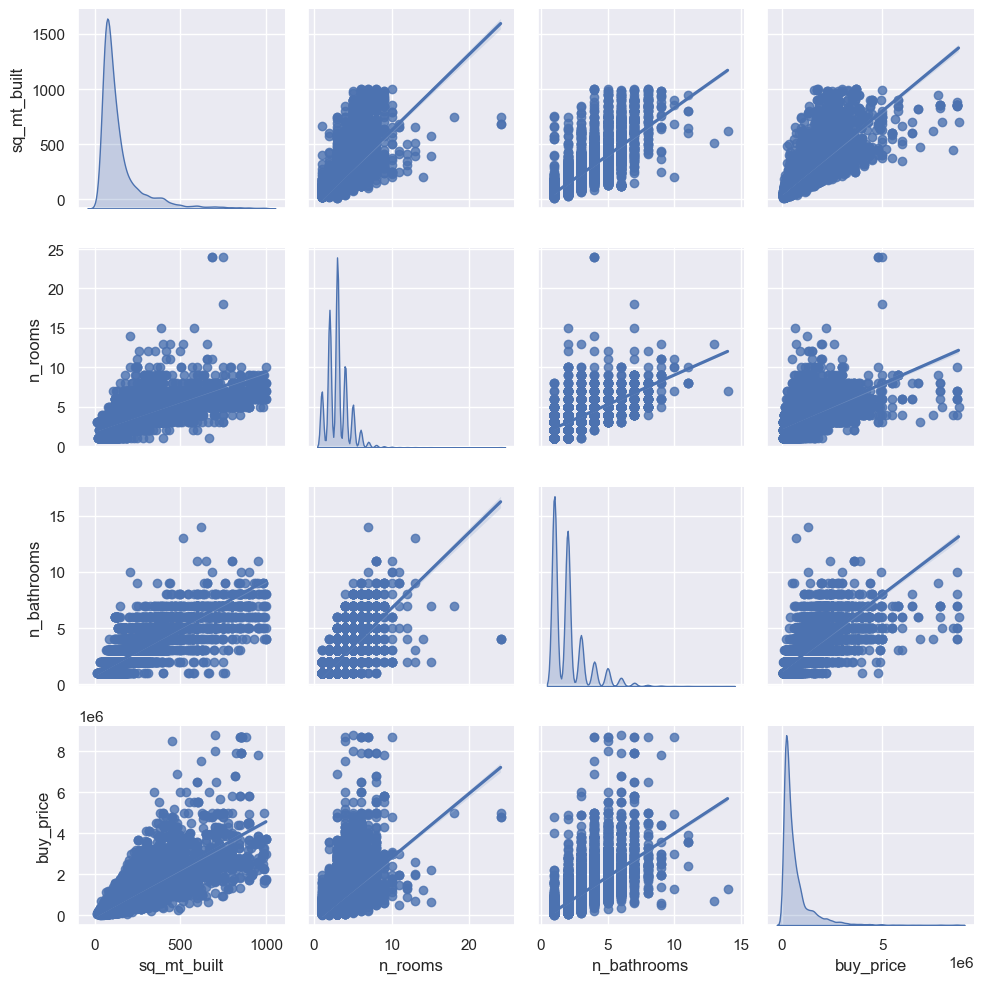

In [30]:
sns.pairplot(cor,kind='reg', diag_kind='kde')
plt.tight_layout()

<Axes: >

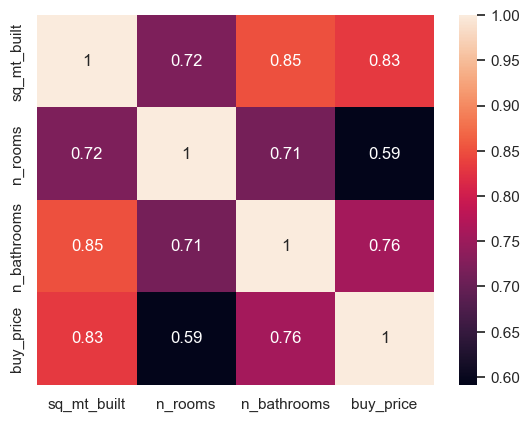

In [31]:
sns.heatmap(cor.corr(), annot=True)

<Axes: xlabel='sq_mt_built', ylabel='buy_price'>

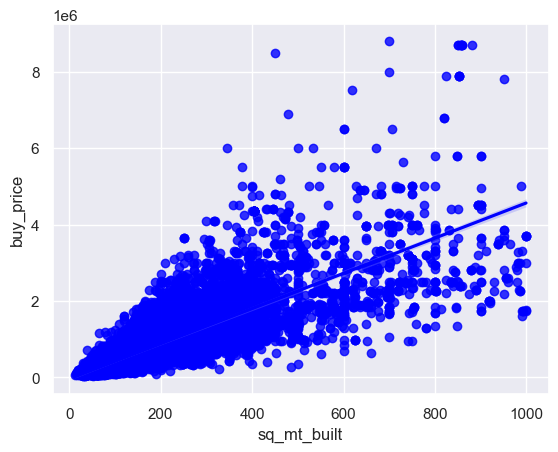

In [32]:
sns.regplot(x='sq_mt_built', y='buy_price', data=df, color='blue')

sq_mt_built has the strongest impact on the house price The correlation between them is  high (0.83) and it’s clear that the larger the area, the higher the price ,we can see that in the heatmap and the regression plot.

The number of rooms and bathrooms also affect the price but not as much as the area.



In [33]:
mean_price=df.groupby('district')['buy_price'].mean().sort_values(ascending=False)
mean_price.head(10)

district
Recoletos              2154973.45
Conde Orgaz-Piovera    1641082.35
Chamartín              1632166.80
Hortaleza              1520190.42
Barrio de Salamanca    1490860.54
El Viso                1440130.80
Almagro                1386729.66
Moncloa                1380931.89
Castellana             1376487.34
Ciudad Universitaria   1298062.59
Name: buy_price, dtype: float64

In [34]:
px.bar(data_frame=mean_price.head(10),title='Mean Price by District',labels={'value':'Mean Price'})

In [35]:
mean_price_area=df.groupby('district')['buy_price_by_area'].mean().sort_values(ascending=False)
mean_price_area.head(10)

district
Recoletos             8778.78
Castellana            7186.06
Barrio de Salamanca   6944.54
Almagro               6638.27
Trafalgar             6471.02
El Viso               6455.41
Jerónimos             6381.11
Goya                  6297.05
Lista                 6145.71
Chueca-Justicia       6101.51
Name: buy_price_by_area, dtype: float64

In [36]:
px.bar(data_frame=mean_price_area.head(10),title='Mean Price by Area by District',labels={'value':'Mean Price by Area'})

The comparison between the average (buy_price) and the average (buy_price_by_area) for each district showed different results.

In the average (buy_price) ranking, districts like Recoletos and Conde Orgaz-Piovera came on top, probably because houses there are bigger, But that doesn’t always mean the area itself is more expensive.

In the average (buy_price_by_area), most of the top districts like Recoletos, Castellana, and Barrio de Salamanca are known for their high prices, So (buy_price_by_area) gives a better idea of which areas are really expensive, not just where the houses are bigger.










In [37]:
df.columns

Index(['id', 'district', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price',
       'buy_price_by_area'],
      dtype='object')

In [38]:
px.scatter(data_frame=df,x='sq_mt_built',y='buy_price',color='district',size='buy_price_by_area',title='Price by Area by District')


-Some districts show up in the high-price range, even if the houses there aren’t that big.

-Some small houses have really big bubbles meaning the price per square meter is high.



